# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description

* carat : weight of the diamond
* cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color : diamond colour, from J (worst) to D (best)
* clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y)
* table : width of top of diamond relative to widest point
* price : price in US dollars
* x : length in mm
* y : width in mm
* z : depth in mm

# Data Exploration

In [2]:
# Import training and test csv files and transform them into dataframes

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
display(train_df.head())
print('-'*60)
display(test_df.head())

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


------------------------------------------------------------


,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [3]:
# Get an overview on the shape of the dataset

print('The shape of the training set is:', train_df.shape)
print('The shape of the test set is:', test_df.shape)

The shape of the training set is: (43152, 11)
The shape of the test set is: (10788, 10)


In [4]:
# Get the datatypes and non-null values of each variable in the dataset

display(train_df.info())
print('-'*60)
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


None

------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


None

In [5]:
# Get the datatypes of each variable in both datasets

display(train_df.dtypes)
print('-'*60)
display(test_df.dtypes)

Id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

------------------------------------------------------------


Id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [6]:
# Calculate the total number of missing values in each column in both datasets

display(train_df.isna().sum())
print('-'*60)
display(test_df.isna().sum())

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

------------------------------------------------------------


Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [7]:
# Check both datasets for duplicated samples

print('The number of duplicated samples in the training dataset:', train_df.duplicated().sum())
print('The number of duplicated samples in the test dataset:', test_df.duplicated().sum())

The number of duplicated samples in the training dataset: 0
The number of duplicated samples in the test dataset: 0


In [8]:
# Get a general description on each variable in both datasets

display(train_df.describe())
print('-'*60)
display(test_df.describe())

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


------------------------------------------------------------


,Id,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,5394.500000,0.798279,61.758315,57.452531,5.729514,5.732559,3.539398
std,3114.371686,0.475700,1.421266,2.236933,1.123736,1.115090,0.695483
min,1.000000,0.200000,54.000000,50.000000,0.000000,0.000000,0.000000
25%,2697.750000,0.400000,61.100000,56.000000,4.720000,4.727500,2.910000
50%,5394.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000
75%,8091.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000
max,10788.000000,4.500000,79.000000,73.000000,10.230000,10.160000,6.720000


# Exploratory Data Analysis

## carat variable

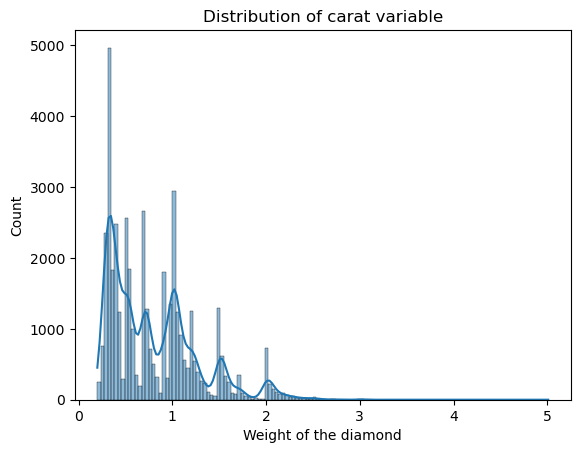

In [9]:
# Visualize the distribution of carat variable

sns.histplot(data=train_df, x='carat', kde=True)
plt.title('Distribution of carat variable')
plt.xlabel('Weight of the diamond')
plt.ylabel('Count')
plt.show()

We can conclude that carat variable is left skewed so, it needs to be normalized.

## cut variable

In [10]:
# Get the number of samples of every category

train_df['cut'].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

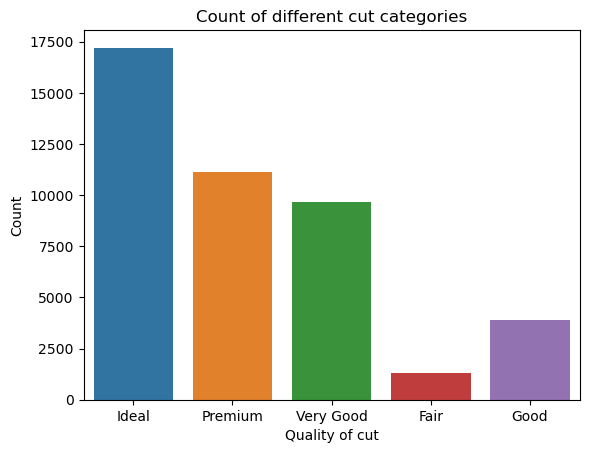

In [11]:
# Visualize the number of samples of every category

sns.countplot(data=train_df, x='cut')
plt.title('Count of different cut categories')
plt.xlabel('Quality of cut')
plt.ylabel('Count')
plt.show()

## color variable

In [12]:
# Get the number of samples of every category

train_df['color'].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

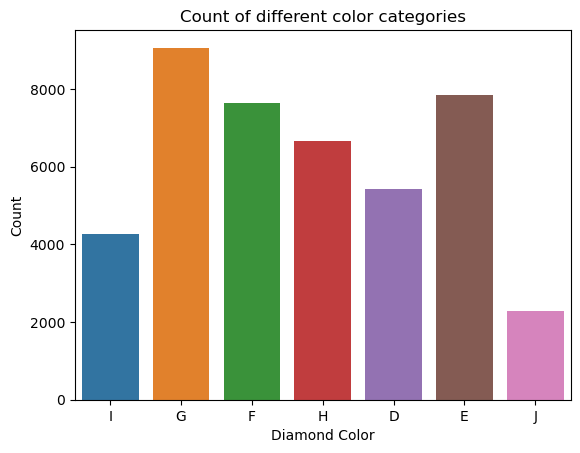

In [13]:
# Visualize the number of samples of every category

sns.countplot(data=train_df, x='color')
plt.title('Count of different color categories')
plt.xlabel('Diamond Color')
plt.ylabel('Count')
plt.show()

## clarity variable

In [14]:
# Get the number of samples of every category

train_df['clarity'].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

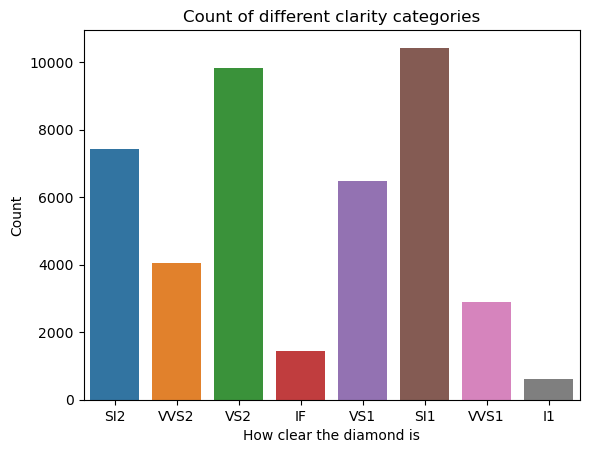

In [15]:
# Visualize the number of samples of every category

sns.countplot(data=train_df, x='clarity')
plt.title('Count of different clarity categories')
plt.xlabel('How clear the diamond is')
plt.ylabel('Count')
plt.show()

## depth variable

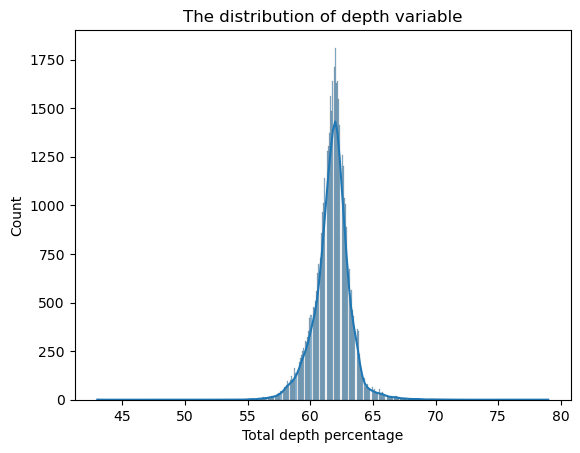

In [16]:
# Visualize the distribution of depth variable

sns.histplot(data=train_df, x='depth', kde=True)
plt.title('The distribution of depth variable')
plt.xlabel('Total depth percentage')
plt.ylabel('Count')
plt.show()

Depth variable has a normal distribution so, it doesn't need to be normalized and we can feed it like it is to our model.

## table variable

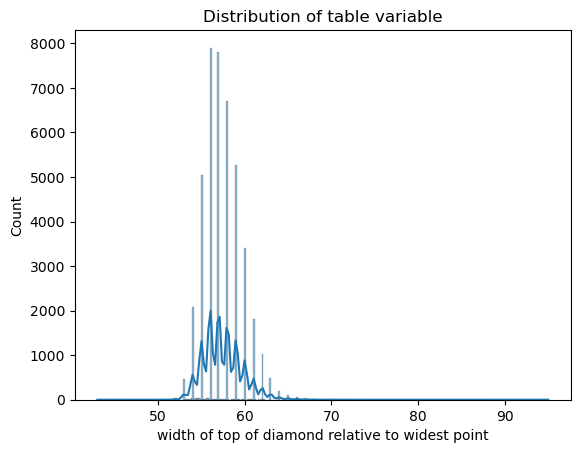

In [17]:
# Visualize the distribution of table variable

sns.histplot(data=train_df, x='table', kde=True)
plt.title('Distribution of table variable')
plt.xlabel('width of top of diamond relative to widest point')
plt.ylabel('Count')
plt.show()

We can see that table variable looks much more like a left-skewed distribution than a normal one so, it needs to be normalized to be used in the modeling process.

## price variable

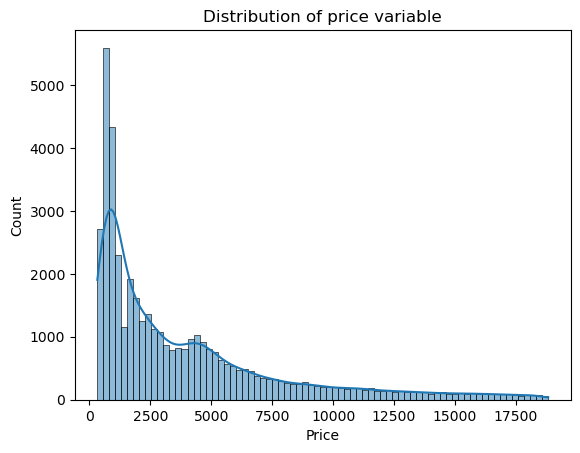

In [18]:
# Visualize the distribution of price variable (Target variable)

sns.histplot(data=train_df, x='price', kde=True)
plt.title('Distribution of price variable')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

When visualizing it, we can see that price variable is extremely left skewed and has a lot of outliers.

## x variable

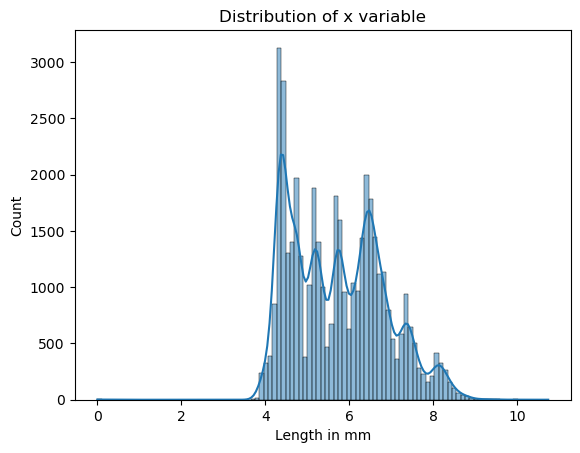

In [19]:
# Visualize the distribution of x variable

sns.histplot(data=train_df, x='x', kde=True)
plt.title('Distribution of x variable')
plt.xlabel('Length in mm')
plt.ylabel('Count')
plt.show()

X variable looks like a normal distribution with a little bit of outliers so, it needs to be normalized.

## y variable

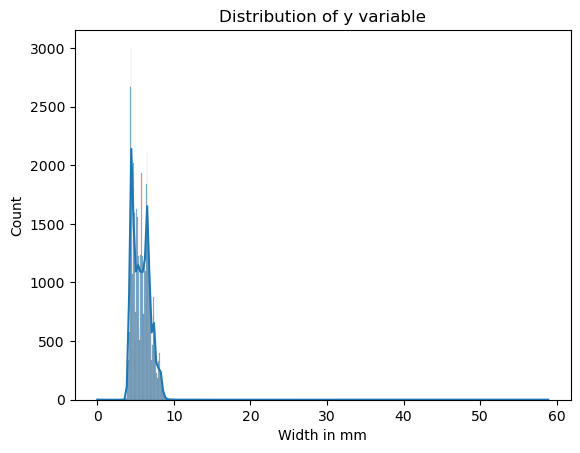

In [20]:
# Visualize the distribution of y variable

sns.histplot(data=train_df, x='y', kde=True)
plt.title('Distribution of y variable')
plt.xlabel('Width in mm')
plt.ylabel('Count')
plt.show()

y variable is left skewed and a lot of outliers so, it needs to be normalized.

## z variable

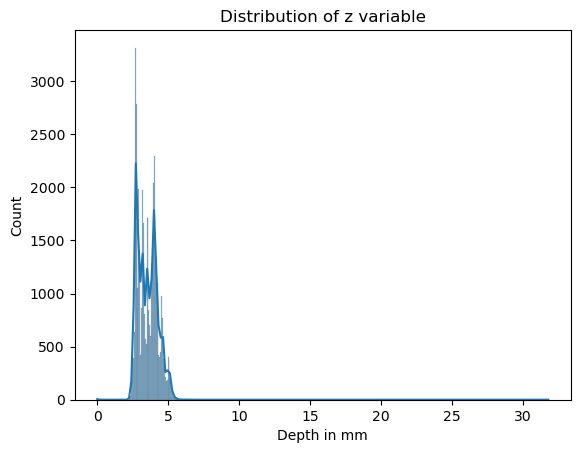

In [21]:
# Visualize the distribution of z variable

sns.histplot(data=train_df, x='z', kde=True)
plt.title('Distribution of z variable')
plt.xlabel('Depth in mm')
plt.ylabel('Count')
plt.show()

z variable is left skewed and has a lot of outliers so, it needs to be normalized.

# Preprocessing

## Dropping columns

In [22]:
# We first need to drop Id column as it's useless for modeling process

train_df.drop('Id', axis=1, inplace=True)
test_df.drop('Id', axis=1, inplace=True)
display(train_df.head())
print('-'*60)
display(test_df.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


------------------------------------------------------------


,carat,cut,color,clarity,depth,table,x,y,z
0,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


# Feature Engineering

In [23]:
# Create Volume feature = length * width * depth

train_df['volume'] = train_df['x'] * train_df['y'] * train_df['z']
test_df['volume'] = test_df['x'] * test_df['y'] * test_df['z']

In [24]:
# Create Mean_xyz feature = (length + width + depth) / 3

train_df['mean_xyz'] = train_df[['x', 'y', 'z']].mean(axis=1)
test_df['mean_xyz'] = test_df[['x', 'y', 'z']].mean(axis=1)

In [25]:
# As we created volume & mean_xyz features, we can safely drop x, y & z features without losing information

train_df.drop(['x', 'y', 'z'], axis=1, inplace=True)
test_df.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [26]:
# Transform Ordinal features to numerical ones as it's important for modeling process(cut, color & clarity)

Cut_dictionary = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
Color_dictionary = {'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
Clarity_dictionary = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}

train_df['cut'] = train_df['cut'].map(Cut_dictionary)
test_df['cut'] = test_df['cut'].map(Cut_dictionary)

train_df['color'] = train_df['color'].map(Color_dictionary)
test_df['color'] = test_df['color'].map(Color_dictionary)

train_df['clarity'] = train_df['clarity'].map(Clarity_dictionary)
test_df['clarity'] = test_df['clarity'].map(Clarity_dictionary)

## Explore the relationship between price variable and independent features

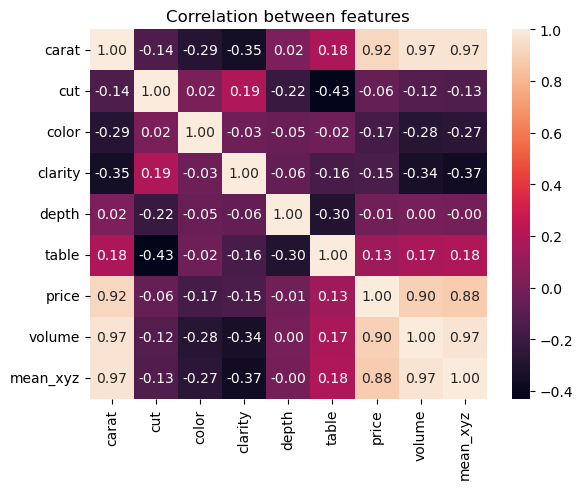

In [27]:
# Visualize the correlation between features in the format of a heatmap

train_corr = train_df.corr()
sns.heatmap(train_corr, annot=True, fmt='.2f')
plt.title('Correlation between features')
plt.show()

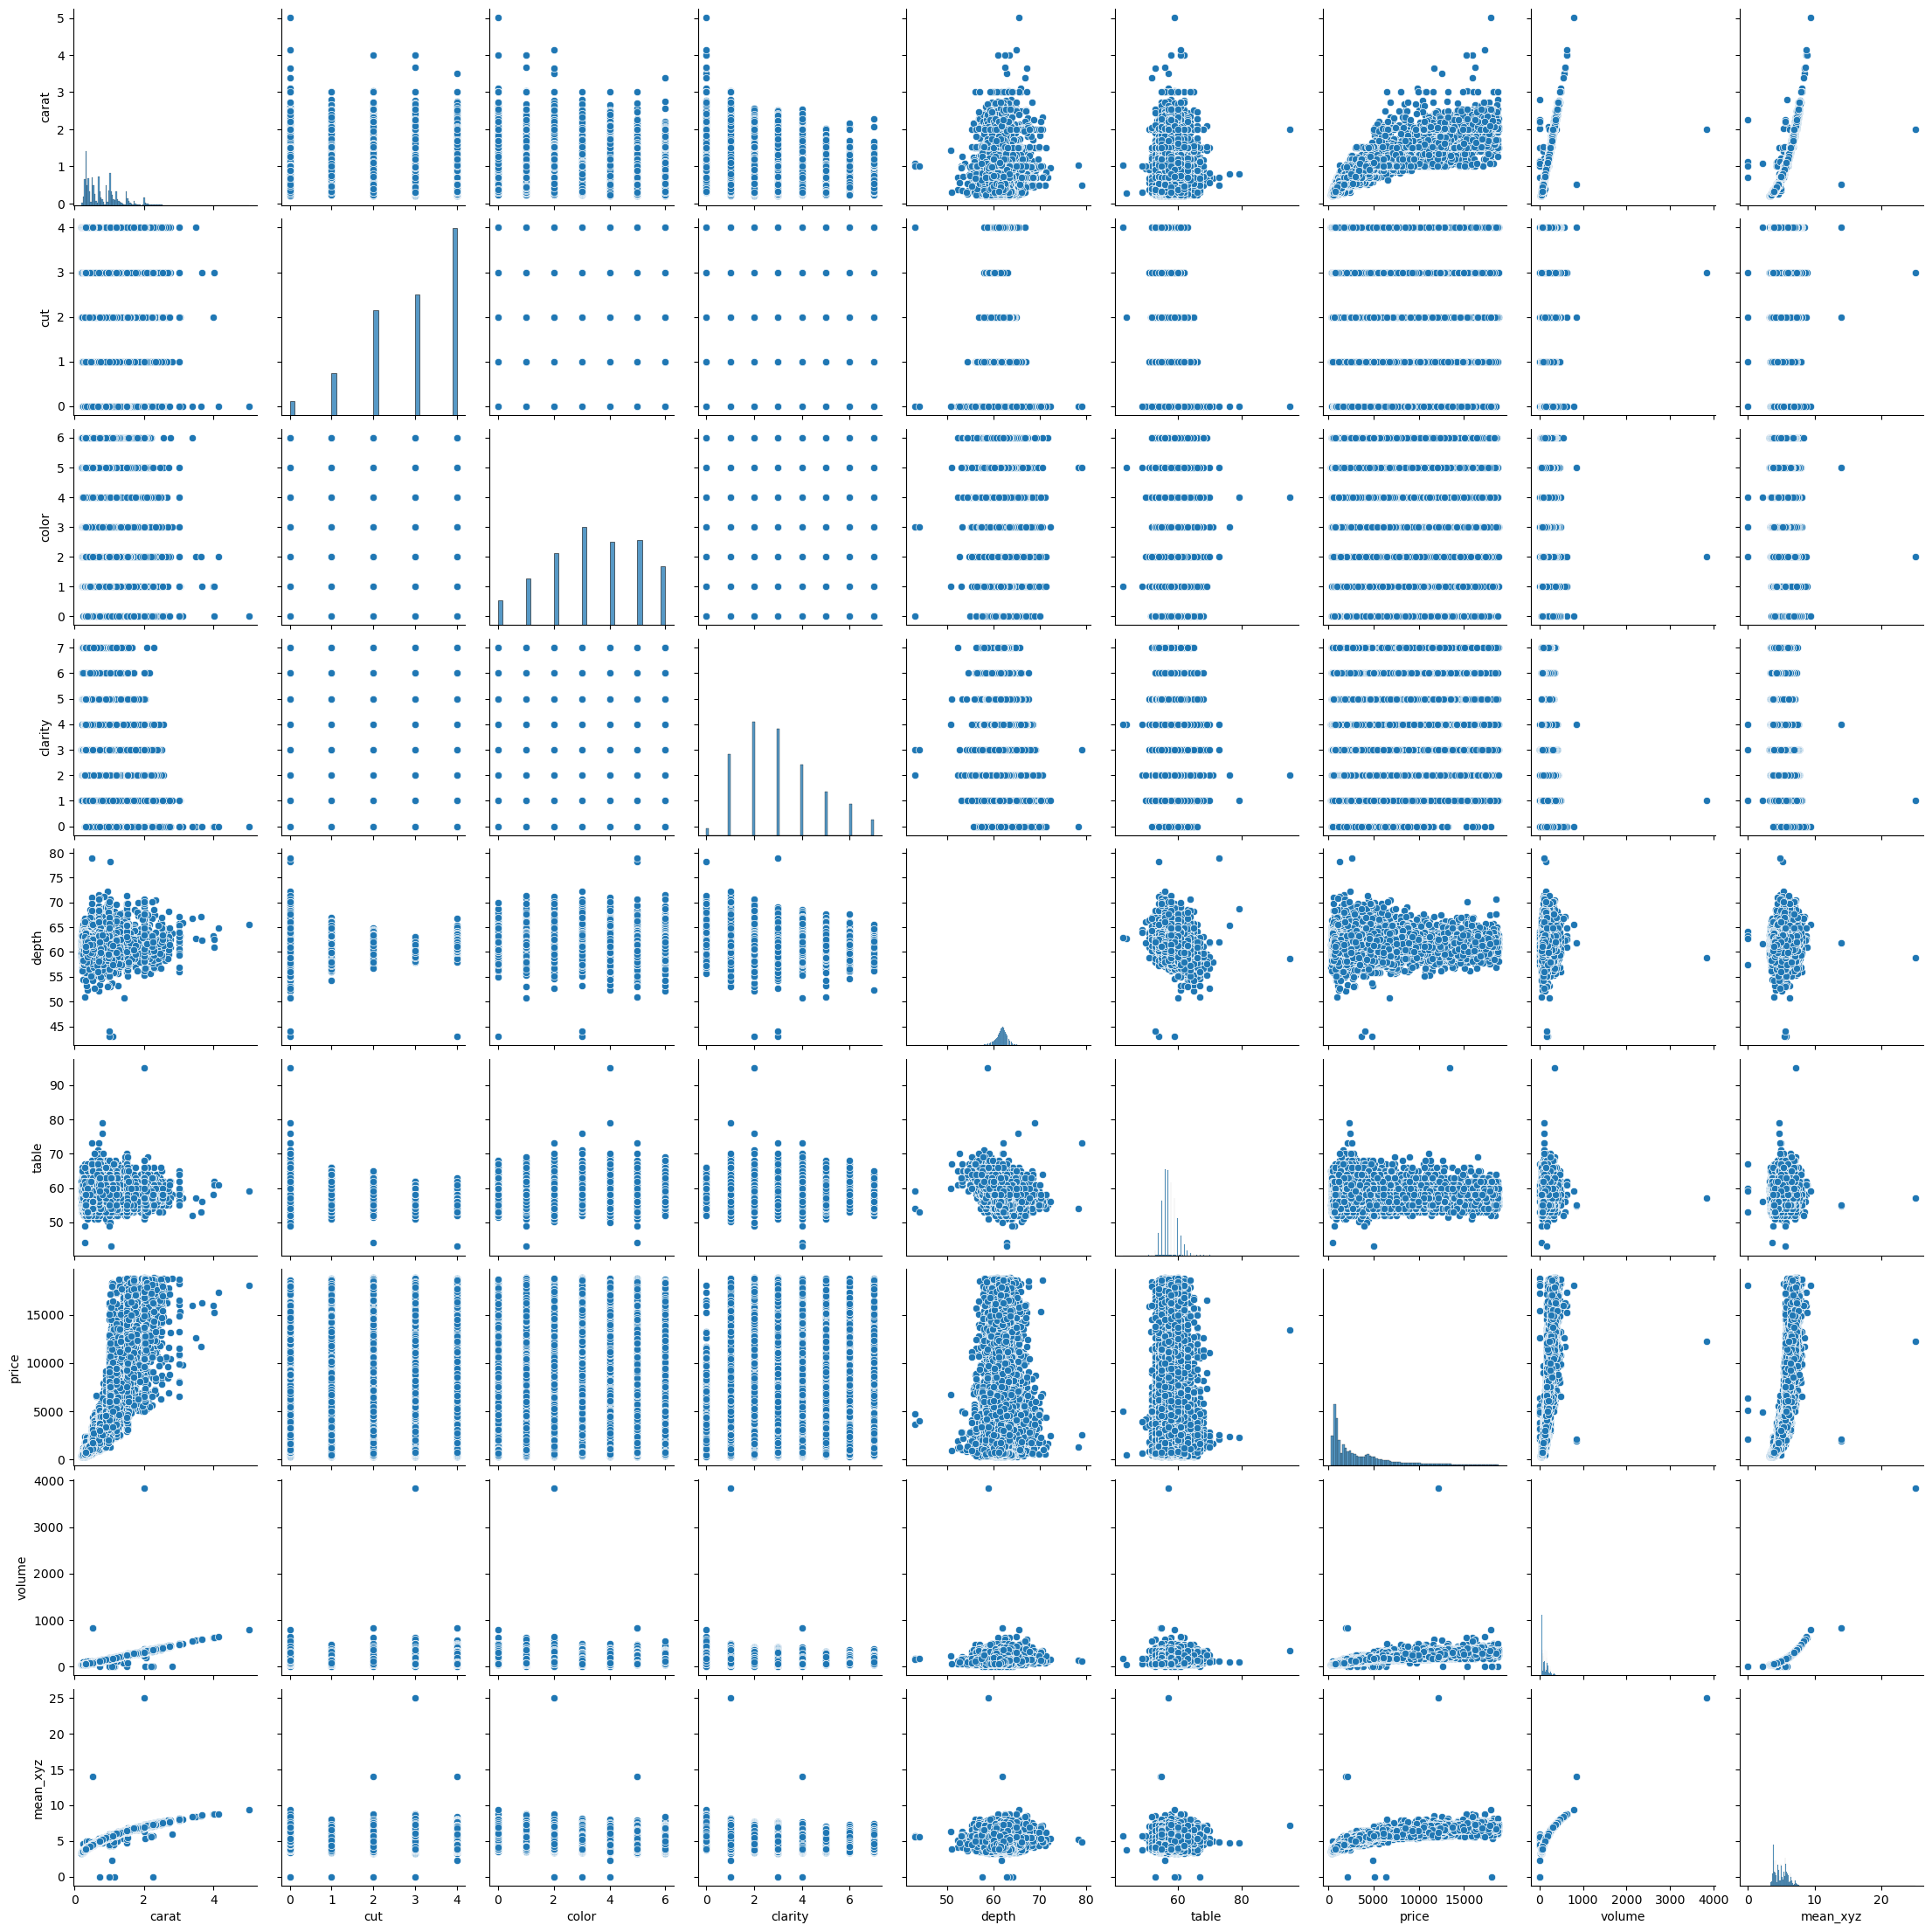

In [28]:
# Visualize the relationship between all features using scatter plots

sns.pairplot(data=train_df)

We can conclude that the target variable is highly correlated with carat, volume & mean_xyz while it has a weak correlation with the other independent features.

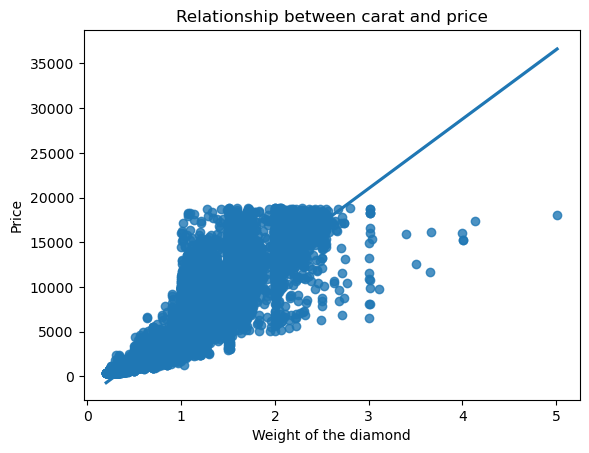

In [29]:
# Explore the relationship between price & carat

sns.regplot(data=train_df, x='carat', y='price')
plt.title('Relationship between carat and price')
plt.xlabel('Weight of the diamond')
plt.ylabel('Price')
plt.show()

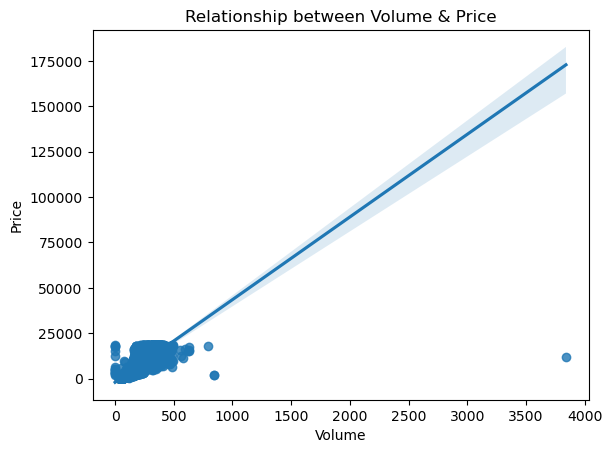

In [30]:
# Explore the relationship between volume & price

sns.regplot(data=train_df, x='volume', y='price')
plt.title('Relationship between Volume & Price')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

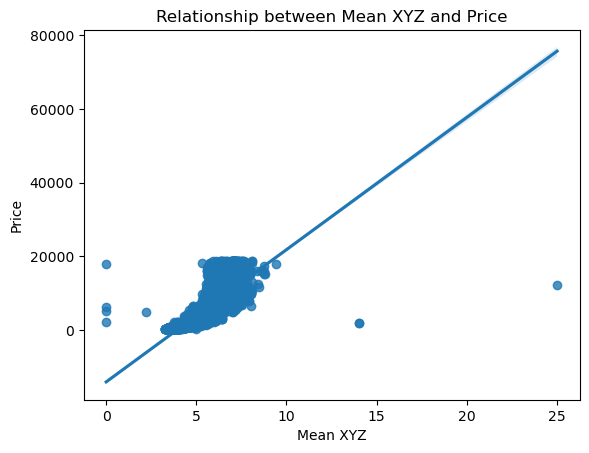

In [31]:
# Explore the relationship between mean_xyz & price

sns.regplot(data=train_df, x='mean_xyz', y='price')
plt.title('Relationship between Mean XYZ and Price')
plt.xlabel('Mean XYZ')
plt.ylabel('Price')
plt.show()

## Outliers

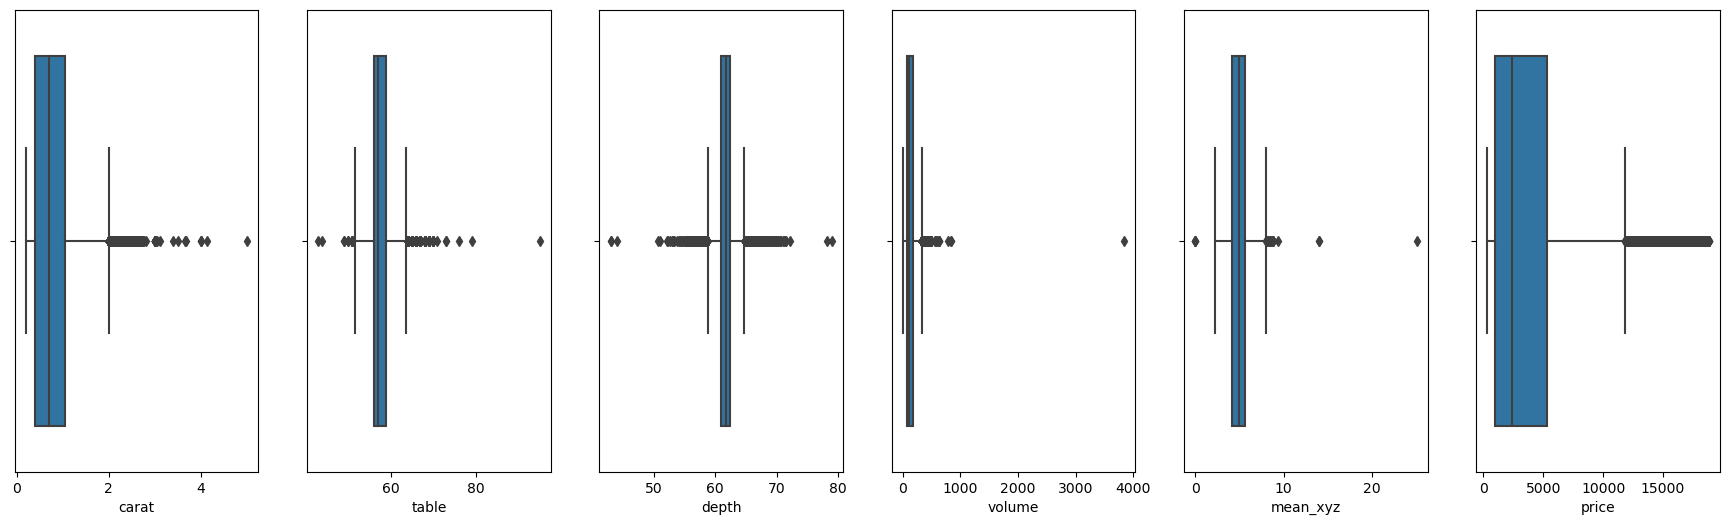

In [32]:
# Checking features for outliers

columns_to_check = ['carat', 'table', 'depth', 'volume', 'mean_xyz', 'price']
fig, ax = plt.subplots(1, 6, figsize=(22, 6))
for i, column in enumerate(columns_to_check):
    sns.boxplot(data=train_df, x=column, ax=ax[i])
plt.show()

We can see that all numerical features have outliers so, they need to be normalized or managed another way. Indeed, a model can be biased if we feed it with data that has outliers

In [33]:
# Splitting data into predictors & labels

X = train_df.drop('price', axis=1)
y = train_df['price']

In [34]:
# Normalization

from sklearn.preprocessing import StandardScaler, MinMaxScaler
S_scaler = StandardScaler()
M_scaler = MinMaxScaler()
X_S_normalized = pd.DataFrame(S_scaler.fit_transform(X), columns=X.columns)
X_M_normalized = pd.DataFrame(M_scaler.fit_transform(X), columns=X.columns)
display(X_S_normalized.head())
print('-'*60)
display(X_M_normalized.head())

,carat,cut,color,clarity,depth,table,volume,mean_xyz
0,0.553529,0.982064,-1.413690,-1.239768,0.036799,-0.205180,0.593112,0.760203
1,1.503722,0.085364,-0.238432,1.185614,-0.590188,0.242472,1.489602,1.464332
2,-1.009010,0.982064,0.349198,-0.027077,-0.311527,-0.652832,-0.978233,-1.175301
3,-0.565586,0.982064,-0.238432,-0.027077,-0.381192,-0.652832,-0.552397,-0.477976
4,-0.206625,0.085364,-0.826061,1.185614,-0.520523,-0.205180,-0.184905,-0.008556


------------------------------------------------------------


,carat,cut,color,clarity,depth,table,volume,mean_xyz
0,0.178794,1.00,0.166667,0.142857,0.522222,0.269231,0.045952,0.229714
1,0.272349,0.75,0.500000,0.714286,0.497222,0.288462,0.064304,0.257295
2,0.024948,1.00,0.666667,0.428571,0.508333,0.250000,0.013785,0.153897
3,0.068607,1.00,0.500000,0.428571,0.505556,0.250000,0.022502,0.181213
4,0.103950,0.75,0.333333,0.714286,0.500000,0.269231,0.030025,0.199600


# Modeling

In [35]:
# Splitting data into training and test datasets using predictors that have been normalized using a standard scaler

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_S_normalized, y, test_size=.2, random_state=0)

In [36]:
# Splitting data into training and test datasets using predictors that have been normalized using a MinMax scaler

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_M_normalized, y, test_size=.2, random_state=0)

In [37]:
# Splitting data into training and test datasets using normal predictors

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=.2, random_state=0)

In [38]:
# Create a variable that records the result obtained after training every model

records = []

# Feature Selection

## Variance Threshold technique

In [39]:
# Calculate the variance of all features

X.var()

carat          0.224291
cut            1.243701
color          2.896032
clarity        2.720005
depth          2.060528
table          4.990326
volume      6181.324435
mean_xyz       0.960293
dtype: float64

In [40]:
from sklearn.feature_selection import VarianceThreshold
sel_1 = VarianceThreshold(threshold=.02)
sel_1.fit(X_train_2)
print('Selection of features :', sel_1.get_support())
print('Selected features :', list(X.columns[sel_1.get_support()]))
print('Deleted features :', list(X.columns[~sel_1.get_support()]))

Selection of features : [ True  True  True  True  True  True  True  True]
Selected features : ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume', 'mean_xyz']
Deleted features : []


## KBest technique

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
sel_2 = SelectKBest(score_func=f_regression, k=6)
sel_2.fit(X_train_2, y_train_2)
print('Selection of features :', sel_2.get_support())
print('Scores of features :', sel_2.scores_)
print('Selected features :', list(X.columns[sel_2.get_support()]))
print('Deleted features :', list(X.columns[~sel_2.get_support()]))

Selection of features : [ True False  True  True False  True  True  True]
Scores of features : [1.98379904e+05 1.11877356e+02 1.06486141e+03 7.77199338e+02
 4.10408114e+00 5.46435227e+02 1.89982668e+05 1.23391702e+05]
Selected features : ['carat', 'color', 'clarity', 'table', 'volume', 'mean_xyz']
Deleted features : ['cut', 'depth']


## Correlation technique

In [42]:
# Delete highly correlated features

def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns

cf = correlatedFeatures(X_train_2, .7)
cf

{'mean_xyz', 'volume'}

## Recursive Feature Elimination (RFE) technique

## Linear Regression

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
sel_3 = RFE(model, n_features_to_select=6)
sel_3.fit(X_train_2, y_train_2)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True  True  True  True  True False False  True]
Ranking of features : [1 1 1 1 1 3 2 1]
Selected features : ['carat', 'cut', 'color', 'clarity', 'depth', 'mean_xyz']
Deleted features : ['table', 'volume']


In [44]:
# Fit a linear regression model with standard normalized data on selected features using Variance Threshold technique

from sklearn.metrics import mean_squared_error, r2_score
selected_features = list(X.columns[sel_1.get_support()])
LinReg_S = LinearRegression()
LinReg_S.fit(X_train[selected_features], y_train)
y_pred_LinReg_S = LinReg_S.predict(X_test[selected_features])
r2_LinReg_S = r2_score(y_test, y_pred_LinReg_S)
print('R2 Score :', r2_LinReg_S)
rmse_LinReg_S = mean_squared_error(y_test, y_pred_LinReg_S, squared=False)
print('RMSE Score :', rmse_LinReg_S)
record = {"Model" : "Linear Regression", "Selection technique" : "Variance Threshold", "Normalization" : "Standard Scaler", 
          "R2_Score" : r2_LinReg_S, "RMSE_Score" : rmse_LinReg_S}
records.append(record)

R2 Score : 0.8794580581527498
RMSE Score : 1387.5660401458254


In [45]:
# Fit a linear regression model with standard normalized data on selected features using KBest technique

selected_features = list(X.columns[sel_2.get_support()])
LinReg_S = LinearRegression()
LinReg_S.fit(X_train[selected_features], y_train)
y_pred_LinReg_S = LinReg_S.predict(X_test[selected_features])
r2_LinReg_S = r2_score(y_test, y_pred_LinReg_S)
print('R2 Score :', r2_LinReg_S)
rmse_LinReg_S = mean_squared_error(y_test, y_pred_LinReg_S, squared=False)
print('RMSE Score :', rmse_LinReg_S)
record = {"Model" : "Linear Regression", "Selection technique" : "KBest", "Normalization" : "Standard Scaler", 
          "R2_Score" : r2_LinReg_S, "RMSE_Score" : rmse_LinReg_S}
records.append(record)

R2 Score : 0.8721922944359626
RMSE Score : 1428.7725232228463


In [46]:
# Fit a linear regression model with standard normalized data on selected features using Correlation technique

features = set(X.columns)
selected_features = features.difference(cf)
LinReg_S = LinearRegression()
LinReg_S.fit(X_train[selected_features], y_train)
y_pred_LinReg_S = LinReg_S.predict(X_test[selected_features])
r2_LinReg_S = r2_score(y_test, y_pred_LinReg_S)
print('R2 Score :', r2_LinReg_S)
rmse_LinReg_S = mean_squared_error(y_test, y_pred_LinReg_S, squared=False)
print('RMSE Score :', rmse_LinReg_S)
record = {"Model" : "Linear Regression", "Selection technique" : "Correlation", "Normalization" : "Standard Scaler", 
          "R2_Score" : r2_LinReg_S, "RMSE_Score" : rmse_LinReg_S}
records.append(record)

R2 Score : 0.8969571264944408
RMSE Score : 1282.902203527055


In [47]:
# Fit a linear regression model with standard normalized data on selected features using RFE technique

selected_features = list(X.columns[sel_3.support_])
LinReg_S = LinearRegression()
LinReg_S.fit(X_train[selected_features], y_train)
y_pred_LinReg_S = LinReg_S.predict(X_test[selected_features])
r2_LinReg_S = r2_score(y_test, y_pred_LinReg_S)
print('R2 Score :', r2_LinReg_S)
rmse_LinReg_S = mean_squared_error(y_test, y_pred_LinReg_S, squared=False)
print('RMSE Score :', rmse_LinReg_S)
record = {"Model" : "Linear Regression", "Selection technique" : "RFE", "Normalization" : "Standard Scaler", 
          "R2_Score" : r2_LinReg_S, "RMSE_Score" : rmse_LinReg_S}
records.append(record)

R2 Score : 0.8956875257834466
RMSE Score : 1290.78138575117


## Polynomial Linear Regression

In [48]:
# Fit a polynomial linear regression model with standard normalized data on selected features using Variance Threshold technique

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
selected_features = list(X.columns[sel_1.get_support()])
X_poly = poly_features.fit_transform(X_train[selected_features])
LinReg_S = LinearRegression()
LinReg_S.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test[selected_features])
y_pred_LinReg_S = LinReg_S.predict(X_test_poly)
r2_LinReg_S = r2_score(y_test, y_pred_LinReg_S)
print('R2 Score :', r2_LinReg_S)
rmse_LinReg_S = mean_squared_error(y_test, y_pred_LinReg_S, squared=False)
print('RMSE Score :', rmse_LinReg_S)
record = {"Model" : "Polynomial Linear Regression", "Selection technique" : "Variance Threshold", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_LinReg_S, "RMSE_Score" : rmse_LinReg_S}
records.append(record)

R2 Score : -5.796935906312681
RMSE Score : 10419.362739953147


In [49]:
# Fit a polynomial linear regression model with standard normalized data on selected features using KBest technique

poly_features = PolynomialFeatures(degree=2)
selected_features = list(X.columns[sel_2.get_support()])
X_poly = poly_features.fit_transform(X_train[selected_features])
LinReg_S = LinearRegression()
LinReg_S.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test[selected_features])
y_pred_LinReg_S = LinReg_S.predict(X_test_poly)
r2_LinReg_S = r2_score(y_test, y_pred_LinReg_S)
print('R2 Score :', r2_LinReg_S)
rmse_LinReg_S = mean_squared_error(y_test, y_pred_LinReg_S, squared=False)
print('RMSE Score :', rmse_LinReg_S)
record = {"Model" : "Polynomial Linear Regression", "Selection technique" : "KBest", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_LinReg_S, "RMSE_Score" : rmse_LinReg_S}
records.append(record)

R2 Score : -10.562110517868371
RMSE Score : 13589.48906982758


In [50]:
# Fit a polynomial linear regression model with standard normalized data on selected features using Correlation technique

poly_features = PolynomialFeatures(degree=2)
selected_features = features.difference(cf)
X_poly = poly_features.fit_transform(X_train[selected_features])
LinReg_S = LinearRegression()
LinReg_S.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test[selected_features])
y_pred_LinReg_S = LinReg_S.predict(X_test_poly)
r2_LinReg_S = r2_score(y_test, y_pred_LinReg_S)
print('R2 Score :', r2_LinReg_S)
rmse_LinReg_S = mean_squared_error(y_test, y_pred_LinReg_S, squared=False)
print('RMSE Score :', rmse_LinReg_S)
record = {"Model" : "Polynomial Linear Regression", "Selection technique" : "Correlation", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_LinReg_S, "RMSE_Score" : rmse_LinReg_S}
records.append(record)

R2 Score : 0.9347595497300246
RMSE Score : 1020.8056035853411


In [51]:
# Fit a polynomial linear regression model with standard normalized data on selected features using RFE technique

poly_features = PolynomialFeatures(degree=2)
selected_features = list(X.columns[sel_3.support_])
X_poly = poly_features.fit_transform(X_train[selected_features])
LinReg_S = LinearRegression()
LinReg_S.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test[selected_features])
y_pred_LinReg_S = LinReg_S.predict(X_test_poly)
r2_LinReg_S = r2_score(y_test, y_pred_LinReg_S)
print('R2 Score :', r2_LinReg_S)
rmse_LinReg_S = mean_squared_error(y_test, y_pred_LinReg_S, squared=False)
print('RMSE Score :', rmse_LinReg_S)
record = {"Model" : "Polynomial Linear Regression", "Selection technique" : "RFE", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_LinReg_S, "RMSE_Score" : rmse_LinReg_S}
records.append(record)

R2 Score : 0.877659971799444
RMSE Score : 1397.8766761325933


## Support Vector Regression

In [52]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
sel_3 = RFE(model, n_features_to_select=6)
sel_3.fit(X_train, y_train)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True  True  True  True False False  True  True]
Ranking of features : [1 1 1 1 2 3 1 1]
Selected features : ['carat', 'cut', 'color', 'clarity', 'volume', 'mean_xyz']
Deleted features : ['depth', 'table']


In [53]:
# Fit a support vector regression model with standard normalized data on selected features using Variance Threshold technique

selected_features = list(X.columns[sel_1.get_support()])
SVR_S = SVR()
SVR_S.fit(X_train[selected_features], y_train)
y_pred_SVR_S = SVR_S.predict(X_test[selected_features])
r2_SVR_S = r2_score(y_test, y_pred_SVR_S)
print('R2 Score :', r2_SVR_S)
rmse_SVR_S = mean_squared_error(y_test, y_pred_SVR_S, squared=False)
print('RMSE Score :', rmse_SVR_S)
record = {"Model" : "Support Vector Regression", "Selection technique" : "Variance Threshold", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_SVR_S, "RMSE_Score" : rmse_SVR_S}
records.append(record)

R2 Score : 0.4624528155840346
RMSE Score : 2930.1703281549985


In [54]:
# Fit a support vector regression model with standard normalized data on selected features using KBest technique

selected_features = list(X.columns[sel_2.get_support()])
SVR_S = SVR()
SVR_S.fit(X_train[selected_features], y_train)
y_pred_SVR_S = SVR_S.predict(X_test[selected_features])
r2_SVR_S = r2_score(y_test, y_pred_SVR_S)
print('R2 Score :', r2_SVR_S)
rmse_SVR_S = mean_squared_error(y_test, y_pred_SVR_S, squared=False)
print('RMSE Score :', rmse_SVR_S)
record = {"Model" : "Support Vector Regression", "Selection technique" : "KBest", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_SVR_S, "RMSE_Score" : rmse_SVR_S}
records.append(record)

R2 Score : 0.5066808053519288
RMSE Score : 2807.039845570262


In [55]:
# Fit a support vector regression model with standard normalized data on selected features using Correlation technique

selected_features = features.difference(cf)
SVR_S = SVR()
SVR_S.fit(X_train[selected_features], y_train)
y_pred_SVR_S = SVR_S.predict(X_test[selected_features])
r2_SVR_S = r2_score(y_test, y_pred_SVR_S)
print('R2 Score :', r2_SVR_S)
rmse_SVR_S = mean_squared_error(y_test, y_pred_SVR_S, squared=False)
print('RMSE Score :', rmse_SVR_S)
record = {"Model" : "Support Vector Regression", "Selection technique" : "Correlation", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_SVR_S, "RMSE_Score" : rmse_SVR_S}
records.append(record)

R2 Score : 0.3683030453009497
RMSE Score : 3176.42760864982


In [56]:
# Fit a support vector regression model with standard normalized data on selected features using RFE technique

selected_features = list(X.columns[sel_3.support_])
SVR_S = SVR()
SVR_S.fit(X_train[selected_features], y_train)
y_pred_SVR_S = SVR_S.predict(X_test[selected_features])
r2_SVR_S = r2_score(y_test, y_pred_SVR_S)
print('R2 Score :', r2_SVR_S)
rmse_SVR_S = mean_squared_error(y_test, y_pred_SVR_S, squared=False)
print('RMSE Score :', rmse_SVR_S)
record = {"Model" : "Support Vector Regression", "Selection technique" : "RFE", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_SVR_S, "RMSE_Score" : rmse_SVR_S}
records.append(record)

R2 Score : 0.512511217366641
RMSE Score : 2790.4027028487476


## Decision Tree Regression

In [57]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
sel_3 = RFE(model, n_features_to_select=6)
sel_3.fit(X_train_2, y_train_2)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True False  True  True  True False  True  True]
Ranking of features : [1 3 1 1 1 2 1 1]
Selected features : ['carat', 'color', 'clarity', 'depth', 'volume', 'mean_xyz']
Deleted features : ['cut', 'table']


In [58]:
# Fit a decision tree regression model with normal data on selected features using Variance Threshold technique

Tree_S = DecisionTreeRegressor()
selected_features = list(X.columns[sel_1.get_support()])
Tree_S.fit(X_train_2[selected_features], y_train_2)
y_pred_Tree_S = Tree_S.predict(X_test_2[selected_features])
r2_Tree_S = r2_score(y_test_2, y_pred_Tree_S)
print('R2 Score :', r2_Tree_S)
rmse_Tree_S = mean_squared_error(y_test_2, y_pred_Tree_S, squared=False)
print('RMSE Score :', rmse_Tree_S)
record = {"Model" : "Decision Tree Regression", "Selection technique" : "Variance Threshold", 
          "Normalization" : "None", "R2_Score" : r2_Tree_S, "RMSE_Score" : rmse_Tree_S}
records.append(record)

R2 Score : 0.963855463185338
RMSE Score : 759.8115698303524


In [59]:
# Fit a decision tree regression model with normal data on selected features using KBest technique

Tree_S = DecisionTreeRegressor()
selected_features = list(X.columns[sel_2.get_support()])
Tree_S.fit(X_train_2[selected_features], y_train_2)
y_pred_Tree_S = Tree_S.predict(X_test_2[selected_features])
r2_Tree_S = r2_score(y_test_2, y_pred_Tree_S)
print('R2 Score :', r2_Tree_S)
rmse_Tree_S = mean_squared_error(y_test_2, y_pred_Tree_S, squared=False)
print('RMSE Score :', rmse_Tree_S)
record = {"Model" : "Decision Tree Regression", "Selection technique" : "KBest", 
          "Normalization" : "None", "R2_Score" : r2_Tree_S, "RMSE_Score" : rmse_Tree_S}
records.append(record)

R2 Score : 0.963813475439828
RMSE Score : 760.252763963065


In [60]:
# Fit a decision tree regression model with normal data on selected features using Correlation technique

Tree_S = DecisionTreeRegressor()
selected_features = features.difference(cf)
Tree_S.fit(X_train_2[selected_features], y_train_2)
y_pred_Tree_S = Tree_S.predict(X_test_2[selected_features])
r2_Tree_S = r2_score(y_test_2, y_pred_Tree_S)
print('R2 Score :', r2_Tree_S)
rmse_Tree_S = mean_squared_error(y_test_2, y_pred_Tree_S, squared=False)
print('RMSE Score :', rmse_Tree_S)
record = {"Model" : "Decision Tree Regression", "Selection technique" : "Correlation", 
          "Normalization" : "None", "R2_Score" : r2_Tree_S, "RMSE_Score" : rmse_Tree_S}
records.append(record)

R2 Score : 0.9663030547534307
RMSE Score : 733.6346525424777


In [61]:
# Fit a decision tree regression model with normal data on selected features using RFE technique

Tree_S = DecisionTreeRegressor()
selected_features = list(X.columns[sel_3.support_])
Tree_S.fit(X_train_2[selected_features], y_train_2)
y_pred_Tree_S = Tree_S.predict(X_test_2[selected_features])
r2_Tree_S = r2_score(y_test_2, y_pred_Tree_S)
print('R2 Score :', r2_Tree_S)
rmse_Tree_S = mean_squared_error(y_test_2, y_pred_Tree_S, squared=False)
print('RMSE Score :', rmse_Tree_S)
record = {"Model" : "Decision Tree Regression", "Selection technique" : "RFE", 
          "Normalization" : "None", "R2_Score" : r2_Tree_S, "RMSE_Score" : rmse_Tree_S}
records.append(record)

R2 Score : 0.9657672894234164
RMSE Score : 739.4438728800308


## Random Forest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
sel_3 = RFE(model, n_features_to_select=6)
sel_3.fit(X_train_2, y_train_2)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True False  True  True  True False  True  True]
Ranking of features : [1 3 1 1 1 2 1 1]
Selected features : ['carat', 'color', 'clarity', 'depth', 'volume', 'mean_xyz']
Deleted features : ['cut', 'table']


In [63]:
# Fit a random forest regression model with normal data on selected features using Variance Threshold technique

Forest_S = RandomForestRegressor()
selected_features = list(X.columns[sel_1.get_support()])
Forest_S.fit(X_train_2[selected_features], y_train_2)
y_pred_Forest_S = Forest_S.predict(X_test_2[selected_features])
r2_Forest_S = r2_score(y_test_2, y_pred_Forest_S)
print('R2 Score :', r2_Forest_S)
rmse_Forest_S = mean_squared_error(y_test_2, y_pred_Forest_S, squared=False)
print('RMSE Score :', rmse_Forest_S)
record = {"Model" : "Random Forest Regression", "Selection technique" : "Variance Threshold", 
          "Normalization" : "None", "R2_Score" : r2_Forest_S, "RMSE_Score" : rmse_Forest_S}
records.append(record)

R2 Score : 0.9795277758094995
RMSE Score : 571.8301960076896


In [64]:
# Fit a random forest regression model with normal data on selected features using KBest technique

Forest_N = RandomForestRegressor()
selected_features = list(X.columns[sel_2.get_support()])
Forest_N.fit(X_train_2[selected_features], y_train_2)
y_pred_Forest_N = Forest_N.predict(X_test_2[selected_features])
r2_Forest_N = r2_score(y_test_2, y_pred_Forest_N)
print('R2 Score :', r2_Forest_N)
rmse_Forest_N = mean_squared_error(y_test_2, y_pred_Forest_N, squared=False)
print('RMSE Score :', rmse_Forest_N)
record = {"Model" : "Random Forest Regression", "Selection technique" : "KBest", 
          "Normalization" : "None", "R2_Score" : r2_Forest_N, "RMSE_Score" : rmse_Forest_N}
records.append(record)

R2 Score : 0.977812945916294
RMSE Score : 595.2979562092823


In [65]:
# Fit a random forest regression model with normal data on selected features using Correlation technique

Forest_N = RandomForestRegressor()
selected_features = features.difference(cf)
Forest_N.fit(X_train_2[selected_features], y_train_2)
y_pred_Forest_N = Forest_N.predict(X_test_2[selected_features])
r2_Forest_N = r2_score(y_test_2, y_pred_Forest_N)
print('R2 Score :', r2_Forest_N)
rmse_Forest_N = mean_squared_error(y_test_2, y_pred_Forest_N, squared=False)
print('RMSE Score :', rmse_Forest_N)
record = {"Model" : "Random Forest Regression", "Selection technique" : "Correlation", 
          "Normalization" : "None", "R2_Score" : r2_Forest_N, "RMSE_Score" : rmse_Forest_N}
records.append(record)

R2 Score : 0.9798865865688906
RMSE Score : 566.7968928762253


In [66]:
# Fit a random forest regression model with normal data on selected features using RFE technique

Forest_N = RandomForestRegressor()
selected_features = list(X.columns[sel_3.support_])
Forest_N.fit(X_train_2[selected_features], y_train_2)
y_pred_Forest_N = Forest_N.predict(X_test_2[selected_features])
r2_Forest_N = r2_score(y_test_2, y_pred_Forest_N)
print('R2 Score :', r2_Forest_N)
rmse_Forest_N = mean_squared_error(y_test_2, y_pred_Forest_N, squared=False)
print('RMSE Score :', rmse_Forest_N)
record = {"Model" : "Random Forest Regression", "Selection technique" : "RFE", 
          "Normalization" : "None", "R2_Score" : r2_Forest_N, "RMSE_Score" : rmse_Forest_N}
records.append(record)

R2 Score : 0.9784952014588962
RMSE Score : 586.0737361905077


## XgBoost

In [67]:
# Installing xgboost library

# !pip install xgboost

In [68]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror')
sel_3 = RFE(model, n_features_to_select=6)
sel_3.fit(X_train_2, y_train_2)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True  True  True  True False False  True  True]
Ranking of features : [1 1 1 1 2 3 1 1]
Selected features : ['carat', 'cut', 'color', 'clarity', 'volume', 'mean_xyz']
Deleted features : ['depth', 'table']


In [69]:
# Fit an XgBoost regression model with normal data on selected features using Variance Threshold technique

Xgb_N = xgb.XGBRegressor(objective='reg:squarederror')
selected_features = list(X.columns[sel_1.get_support()])
Xgb_N.fit(X_train_2[selected_features], y_train_2)
y_pred_Xgb_N = Xgb_N.predict(X_test_2[selected_features])
r2_Xgb_N = r2_score(y_test_2, y_pred_Xgb_N)
print('R2 Score :', r2_Xgb_N)
rmse_Xgb_N = mean_squared_error(y_test_2, y_pred_Xgb_N, squared=False)
print('RMSE Score :', rmse_Xgb_N)
record = {"Model" : "XgBoost Regression", "Selection technique" : "Variance Threshold", "Normalization" : "None", 
          "R2_Score" : r2_Xgb_N, "RMSE_Score" : rmse_Xgb_N}
records.append(record)

R2 Score : 0.9803310494296918
RMSE Score : 560.4994167021001


In [70]:
# Fit an XgBoost regression model with normal data on selected features using KBest technique

Xgb_N = xgb.XGBRegressor(objective='reg:squarederror')
selected_features = list(X.columns[sel_2.get_support()])
Xgb_N.fit(X_train_2[selected_features], y_train_2)
y_pred_Xgb_N = Xgb_N.predict(X_test_2[selected_features])
r2_Xgb_N = r2_score(y_test_2, y_pred_Xgb_N)
print('R2 Score :', r2_Xgb_N)
rmse_Xgb_N = mean_squared_error(y_test_2, y_pred_Xgb_N, squared=False)
print('RMSE Score :', rmse_Xgb_N)
record = {"Model" : "XgBoost Regression", "Selection technique" : "KBest", "Normalization" : "None", 
          "R2_Score" : r2_Xgb_N, "RMSE_Score" : rmse_Xgb_N}
records.append(record)

R2 Score : 0.977431383629027
RMSE Score : 600.3949596685012


In [71]:
# Fit an XgBoost regression model with normal data on selected features using Correlation technique

Xgb_N = xgb.XGBRegressor(objective='reg:squarederror')
selected_features = features.difference(cf)
Xgb_N.fit(X_train_2[selected_features], y_train_2)
y_pred_Xgb_N = Xgb_N.predict(X_test_2[selected_features])
r2_Xgb_N = r2_score(y_test_2, y_pred_Xgb_N)
print('R2 Score :', r2_Xgb_N)
rmse_Xgb_N = mean_squared_error(y_test_2, y_pred_Xgb_N, squared=False)
print('RMSE Score :', rmse_Xgb_N)
record = {"Model" : "XgBoost Regression", "Selection technique" : "Correlation", "Normalization" : "None", 
          "R2_Score" : r2_Xgb_N, "RMSE_Score" : rmse_Xgb_N}
records.append(record)

R2 Score : 0.9802107140419499
RMSE Score : 562.2113806054127


In [72]:
# Fit an XgBoost regression model with normal data on selected features using RFE technique

Xgb_N = xgb.XGBRegressor(objective='reg:squarederror')
selected_features = list(X.columns[sel_3.support_])
Xgb_N.fit(X_train_2[selected_features], y_train_2)
y_pred_Xgb_N = Xgb_N.predict(X_test_2[selected_features])
r2_Xgb_N = r2_score(y_test_2, y_pred_Xgb_N)
print('R2 Score :', r2_Xgb_N)
rmse_Xgb_N = mean_squared_error(y_test_2, y_pred_Xgb_N, squared=False)
print('RMSE Score :', rmse_Xgb_N)
record = {"Model" : "XgBoost Regression", "Selection technique" : "RFE", "Normalization" : "None", 
          "R2_Score" : r2_Xgb_N, "RMSE_Score" : rmse_Xgb_N}
records.append(record)

R2 Score : 0.9790252557748498
RMSE Score : 578.8058438775754


In [73]:
# Fit an XgBoost regression model with normal data on selected features using Variance Threshold technique using Cross-Validation technique

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
rmse_scorer = make_scorer(lambda y_true, y_pred : -mean_squared_error(y_true, y_pred, squared=False), greater_is_better=False)
Xgb_N = xgb.XGBRegressor(objective='reg:squarederror')
selected_features = list(X.columns[sel_1.get_support()])
cv_results_Xgb_N = cross_val_score(Xgb_N, X[selected_features], y, cv=10, scoring=rmse_scorer)
print('The list of scores is:', cv_results_Xgb_N)
print('The mean of scores is:', np.mean(cv_results_Xgb_N))
print('The standard deviation of scores is:', np.std(cv_results_Xgb_N))

The list of scores is: [578.92171202 533.78256023 572.20854403 541.37068708 540.31339033
 542.38517466 545.67489526 540.68014604 546.74097422 585.43454885]
The mean of scores is: 552.7512632730384
The standard deviation of scores is: 17.649564963935106


## Gradient Boosting Regression

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
sel_3 = RFE(model, n_features_to_select=6)
sel_3.fit(X_train_2, y_train_2)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True  True  True  True False False  True  True]
Ranking of features : [1 1 1 1 2 3 1 1]
Selected features : ['carat', 'cut', 'color', 'clarity', 'volume', 'mean_xyz']
Deleted features : ['depth', 'table']


In [75]:
# Fit a Gradient Boosting regression model with standard normalized data on selected features using Variance Threshold technique

selected_features = list(X.columns[sel_1.get_support()])
Gb_regressor_S = GradientBoostingRegressor()
Gb_regressor_S.fit(X_train[selected_features], y_train)
y_pred_Gb_regressor_S = Gb_regressor_S.predict(X_test[selected_features])
r2_Gb_regressor_S = r2_score(y_test, y_pred_Gb_regressor_S)
print('R2 Score :', r2_Gb_regressor_S)
rmse_Gb_regressor_S = mean_squared_error(y_test, y_pred_Gb_regressor_S, squared=False)
print('RMSE Score :', rmse_Gb_regressor_S)
record = {"Model" : "Gradient Boosting Regression", "Selection technique" : "All Features", 
          "Variance Threshold" : "Standard Scaler", "R2_Score" : r2_Gb_regressor_S, "RMSE_Score" : rmse_Gb_regressor_S}
records.append(record)

R2 Score : 0.9741513968459612
RMSE Score : 642.5443513292817


In [76]:
# Fit a Gradient Boosting regression model with standard normalized data on selected features using KBest technique

Gb_regressor_S = GradientBoostingRegressor()
selected_features = list(X.columns[sel_2.get_support()])
Gb_regressor_S.fit(X_train[selected_features], y_train)
y_pred_Gb_regressor_S = Gb_regressor_S.predict(X_test[selected_features])
r2_Gb_regressor_S = r2_score(y_test, y_pred_Gb_regressor_S)
print('R2 Score :', r2_Gb_regressor_S)
rmse_Gb_regressor_S = mean_squared_error(y_test, y_pred_Gb_regressor_S, squared=False)
print('RMSE Score :', rmse_Gb_regressor_S)
record = {"Model" : "Gradient Boosting Regression", "Selection technique" : "KBest", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_Gb_regressor_S, "RMSE_Score" : rmse_Gb_regressor_S}
records.append(record)

R2 Score : 0.9737454427790951
RMSE Score : 647.5702963261859


In [77]:
# Fit a Gradient Boosting regression model with standard normalized data on selected features using Correlation technique

Gb_regressor_S = GradientBoostingRegressor()
selected_features = features.difference(cf)
Gb_regressor_S.fit(X_train[selected_features], y_train)
y_pred_Gb_regressor_S = Gb_regressor_S.predict(X_test[selected_features])
r2_Gb_regressor_S = r2_score(y_test, y_pred_Gb_regressor_S)
print('R2 Score :', r2_Gb_regressor_S)
rmse_Gb_regressor_S = mean_squared_error(y_test, y_pred_Gb_regressor_S, squared=False)
print('RMSE Score :', rmse_Gb_regressor_S)
record = {"Model" : "Gradient Boosting Regression", "Selection technique" : "Correlation", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_Gb_regressor_S, "RMSE_Score" : rmse_Gb_regressor_S}
records.append(record)

R2 Score : 0.9750178849637583
RMSE Score : 631.6829755907307


In [78]:
# Fit a Gradient Boosting regression model with standard normalized data on selected features using RFE technique

Gb_regressor_S = GradientBoostingRegressor()
selected_features = list(X.columns[sel_3.support_])
Gb_regressor_S.fit(X_train[selected_features], y_train)
y_pred_Gb_regressor_S = Gb_regressor_S.predict(X_test[selected_features])
r2_Gb_regressor_S = r2_score(y_test, y_pred_Gb_regressor_S)
print('R2 Score :', r2_Gb_regressor_S)
rmse_Gb_regressor_S = mean_squared_error(y_test, y_pred_Gb_regressor_S, squared=False)
print('RMSE Score :', rmse_Gb_regressor_S)
record = {"Model" : "Gradient Boosting Regression", "Selection technique" : "RFE", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_Gb_regressor_S, "RMSE_Score" : rmse_Gb_regressor_S}
records.append(record)

R2 Score : 0.9744180974442918
RMSE Score : 639.220935950578


## K-Nearest Neighbors

In [79]:
# from sklearn.neighbors import KNeighborsRegressor

model = RandomForestRegressor()
sel_3 = RFE(model, n_features_to_select=6)
sel_3.fit(X_train_2, y_train_2)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True False  True  True  True False  True  True]
Ranking of features : [1 3 1 1 1 2 1 1]
Selected features : ['carat', 'color', 'clarity', 'depth', 'volume', 'mean_xyz']
Deleted features : ['cut', 'table']


In [81]:
# Fit a K-Nearest Neighbors model with standard normalized data on selected features using Variance Threshold technique

from sklearn.neighbors import KNeighborsRegressor
Knn_S = KNeighborsRegressor(n_neighbors=3)
selected_features = list(X.columns[sel_1.get_support()])
Knn_S.fit(X_train[selected_features], y_train)
y_pred_Knn_S = Knn_S.predict(X_test[selected_features])
r2_Knn_S = r2_score(y_test, y_pred_Knn_S)
print('R2 Score :', r2_Knn_S)
rmse_Knn_S = mean_squared_error(y_test, y_pred_Knn_S, squared=False)
print('RMSE Score :', rmse_Knn_S)
record = {"Model" : "K-Nearest Neighbors", "Selection technique" : "Variance Threshold", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_Knn_S, "RMSE_Score" : rmse_Knn_S}
records.append(record)

R2 Score : 0.9601109676839491
RMSE Score : 798.1992600967417


In [82]:
# Fit a K-Nearest Neighbors model with standard normalized data on selected features using KBest technique

Knn_S = KNeighborsRegressor(n_neighbors=3)
selected_features = list(X.columns[sel_2.get_support()])
Knn_S.fit(X_train[selected_features], y_train)
y_pred_Knn_S = Knn_S.predict(X_test[selected_features])
r2_Knn_S = r2_score(y_test, y_pred_Knn_S)
print('R2 Score :', r2_Knn_S)
rmse_Knn_S = mean_squared_error(y_test, y_pred_Knn_S, squared=False)
print('RMSE Score :', rmse_Knn_S)
record = {"Model" : "K-Nearest Neighbors", "Selection technique" : "KBest", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_Knn_S, "RMSE_Score" : rmse_Knn_S}
records.append(record)

R2 Score : 0.9695444440310381
RMSE Score : 697.4576409401354


In [83]:
# Fit a K-Nearest Neighbors model with standard normalized data on selected features using Correlation technique

Knn_S = KNeighborsRegressor(n_neighbors=3)
selected_features = features.difference(cf)
Knn_S.fit(X_train[selected_features], y_train)
y_pred_Knn_S = Knn_S.predict(X_test[selected_features])
r2_Knn_S = r2_score(y_test, y_pred_Knn_S)
print('R2 Score :', r2_Knn_S)
rmse_Knn_S = mean_squared_error(y_test, y_pred_Knn_S, squared=False)
print('RMSE Score :', rmse_Knn_S)
record = {"Model" : "K-Nearest Neighbors", "Selection technique" : "Correlation", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_Knn_S, "RMSE_Score" : rmse_Knn_S}
records.append(record)

R2 Score : 0.9510623382619714
RMSE Score : 884.1097456648334


In [84]:
# Fit a K-Nearest Neighbors model with standard normalized data on selected features using RFE technique

Knn_S = KNeighborsRegressor(n_neighbors=3)
selected_features = list(X.columns[sel_3.support_])
Knn_S.fit(X_train[selected_features], y_train)
y_pred_Knn_S = Knn_S.predict(X_test[selected_features])
r2_Knn_S = r2_score(y_test, y_pred_Knn_S)
print('R2 Score :', r2_Knn_S)
rmse_Knn_S = mean_squared_error(y_test, y_pred_Knn_S, squared=False)
print('RMSE Score :', rmse_Knn_S)
record = {"Model" : "K-Nearest Neighbors", "Selection technique" : "RFE", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_Knn_S, "RMSE_Score" : rmse_Knn_S}
records.append(record)

R2 Score : 0.9707416156269647
RMSE Score : 683.6120997718417


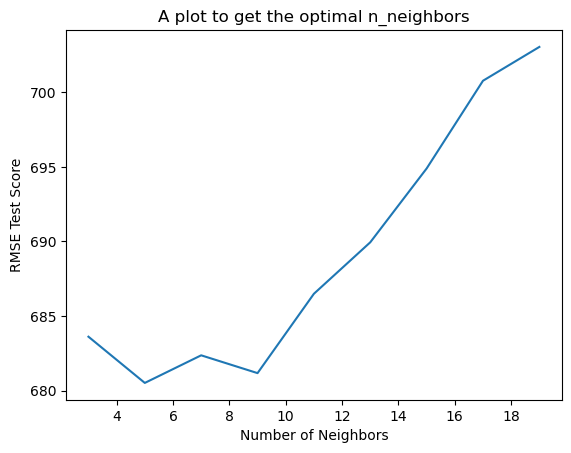

In [85]:
# Try a different set of n_neighbors hyperparameter to get the optimal value among them

neighbors = [i for i in range(3, 20, 2)]
rmse_scores = []
for neighbor in neighbors:
    Knn_M = KNeighborsRegressor(n_neighbors=neighbor)
    Knn_M.fit(X_train[selected_features], y_train)
    y_pred_Knn_M = Knn_M.predict(X_test[selected_features])
    rmse_Knn_M = mean_squared_error(y_test, y_pred_Knn_M, squared=False)
    rmse_scores.append(rmse_Knn_M)

plt.plot(neighbors, rmse_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE Test Score')
plt.title('A plot to get the optimal n_neighbors')
plt.show()

So, we conclude that the optimal n_neighbors hyperparameter is 5 and that's the best RMSE test score that we could obtain.

In [86]:
# Fit a K-Nearest Neighbors (n_neighbors=5) model with standard normalized data on selected features using RFE technique

Knn_S = KNeighborsRegressor(n_neighbors=5)
Knn_S.fit(X_train[selected_features], y_train)
y_pred_Knn_S = Knn_S.predict(X_test[selected_features])
r2_Knn_S = r2_score(y_test, y_pred_Knn_S)
print('R2 Score :', r2_Knn_S)
rmse_Knn_S = mean_squared_error(y_test, y_pred_Knn_S, squared=False)
print('RMSE Score :', rmse_Knn_S)
record = {"Model" : "K-Nearest Neighbors", "Selection technique" : "RFE", 
          "Normalization" : "Standard Scaler", "R2_Score" : r2_Knn_S, "RMSE_Score" : rmse_Knn_S}
records.append(record)

R2 Score : 0.971006412930812
RMSE Score : 680.5116197355225


## Ridge Regression

In [87]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=.1)
sel_3 = RFE(model, n_features_to_select=6)
sel_3.fit(X_train_2, y_train_2)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True  True  True  True  True False False  True]
Ranking of features : [1 1 1 1 1 3 2 1]
Selected features : ['carat', 'cut', 'color', 'clarity', 'depth', 'mean_xyz']
Deleted features : ['table', 'volume']


In [88]:
# Fit a Ridge Regression model with standard normalized data on selected features using Variance Threshold technique

Ridge_S = Ridge(alpha=.1)
selected_features = list(X.columns[sel_1.get_support()])
Ridge_S.fit(X_train[selected_features], y_train)
y_pred_Ridge_S = Ridge_S.predict(X_test[selected_features])
r2_Ridge_S = r2_score(y_test, y_pred_Ridge_S)
print('R2 Score :', r2_Ridge_S)
rmse_Ridge_S = mean_squared_error(y_test, y_pred_Ridge_S, squared=False)
print('RMSE Score :', rmse_Ridge_S)
record = {"Model" : "Ridge Regression", "Selection technique" : "Variance Threshold", "Normalization" : "Standard Scaler", 
          "R2_Score" : r2_Ridge_S, "RMSE_Score" : rmse_Ridge_S}
records.append(record)

R2 Score : 0.8794462154905238
RMSE Score : 1387.6341992948105


In [89]:
# Fit a Ridge Regression model with standard normalized data on selected features using KBest technique

Ridge_S = Ridge(alpha=.1)
selected_features = list(X.columns[sel_2.get_support()])
Ridge_S.fit(X_train[selected_features], y_train)
y_pred_Ridge_S = Ridge_S.predict(X_test[selected_features])
r2_Ridge_S = r2_score(y_test, y_pred_Ridge_S)
print('R2 Score :', r2_Ridge_S)
rmse_Ridge_S = mean_squared_error(y_test, y_pred_Ridge_S, squared=False)
print('RMSE Score :', rmse_Ridge_S)
record = {"Model" : "Ridge Regression", "Selection technique" : "KBest", "Normalization" : "Standard Scaler", 
          "R2_Score" : r2_Ridge_S, "RMSE_Score" : rmse_Ridge_S}
records.append(record)

R2 Score : 0.8721826532804507
RMSE Score : 1428.8264118293948


In [90]:
# Fit a Ridge Regression model with standard normalized data on selected features using Correlation technique

Ridge_S = Ridge(alpha=.1)
selected_features = features.difference(cf)
Ridge_S.fit(X_train[selected_features], y_train)
y_pred_Ridge_S = Ridge_S.predict(X_test[selected_features])
r2_Ridge_S = r2_score(y_test, y_pred_Ridge_S)
print('R2 Score :', r2_Ridge_S)
rmse_Ridge_S = mean_squared_error(y_test, y_pred_Ridge_S, squared=False)
print('RMSE Score :', rmse_Ridge_S)
record = {"Model" : "Ridge Regression", "Selection technique" : "Correlation", "Normalization" : "Standard Scaler", 
          "R2_Score" : r2_Ridge_S, "RMSE_Score" : rmse_Ridge_S}
records.append(record)

R2 Score : 0.8969571521889913
RMSE Score : 1282.9020435761704


In [91]:
# Fit a Ridge Regression model with standard normalized data on selected features using RFE technique

Ridge_S = Ridge(alpha=.1)
selected_features = list(X.columns[sel_3.support_])
Ridge_S.fit(X_train[selected_features], y_train)
y_pred_Ridge_S = Ridge_S.predict(X_test[selected_features])
r2_Ridge_S = r2_score(y_test, y_pred_Ridge_S)
print('R2 Score :', r2_Ridge_S)
rmse_Ridge_S = mean_squared_error(y_test, y_pred_Ridge_S, squared=False)
print('RMSE Score :', rmse_Ridge_S)
record = {"Model" : "Ridge Regression", "Selection technique" : "RFE", "Normalization" : "Standard Scaler", 
          "R2_Score" : r2_Ridge_S, "RMSE_Score" : rmse_Ridge_S}
records.append(record)

R2 Score : 0.8956895695827798
RMSE Score : 1290.768740518289


## Lasso Regression

In [92]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=.1)
sel_3 = RFE(model, n_features_to_select=6)
sel_3.fit(X_train_2, y_train_2)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True  True  True  True  True False False  True]
Ranking of features : [1 1 1 1 1 3 2 1]
Selected features : ['carat', 'cut', 'color', 'clarity', 'depth', 'mean_xyz']
Deleted features : ['table', 'volume']


In [93]:
# Fit a Ridge Regression model with standard normalized data on selected features using Variance Threshold technique

Lasso_S = Lasso(alpha=.1)
selected_features = list(X.columns[sel_1.get_support()])
Lasso_S.fit(X_train[selected_features], y_train)
y_pred_Lasso_S = Lasso_S.predict(X_test[selected_features])
r2_Lasso_S = r2_score(y_test, y_pred_Lasso_S)
print('R2 Score :', r2_Lasso_S)
rmse_Lasso_S = mean_squared_error(y_test, y_pred_Lasso_S, squared=False)
print('RMSE Score :', rmse_Lasso_S)
record = {"Model" : "Ridge Regression", "Selection technique" : "Variance Threshold", "Normalization" : "Standard Scaler", 
          "R2_Score" : r2_Lasso_S, "RMSE_Score" : rmse_Lasso_S}
records.append(record)

R2 Score : 0.8795923381784271
RMSE Score : 1386.7929717891775


In [94]:
# Fit a Ridge Regression model with standard normalized data on selected features using KBest technique

Lasso_S = Lasso(alpha=.1)
selected_features = list(X.columns[sel_2.get_support()])
Lasso_S.fit(X_train[selected_features], y_train)
y_pred_Lasso_S = Lasso_S.predict(X_test[selected_features])
r2_Lasso_S = r2_score(y_test, y_pred_Lasso_S)
print('R2 Score :', r2_Lasso_S)
rmse_Lasso_S = mean_squared_error(y_test, y_pred_Lasso_S, squared=False)
print('RMSE Score :', rmse_Lasso_S)
record = {"Model" : "Ridge Regression", "Selection technique" : "KBest", "Normalization" : "Standard Scaler", 
          "R2_Score" : r2_Lasso_S, "RMSE_Score" : rmse_Lasso_S}
records.append(record)

R2 Score : 0.8723534390015216
RMSE Score : 1427.8715151588372


In [95]:
# Fit a Ridge Regression model with standard normalized data on selected features using Correlation technique

Lasso_S = Lasso(alpha=.1)
selected_features = features.difference(cf)
Lasso_S.fit(X_train[selected_features], y_train)
y_pred_Lasso_S = Lasso_S.predict(X_test[selected_features])
r2_Lasso_S = r2_score(y_test, y_pred_Lasso_S)
print('R2 Score :', r2_Lasso_S)
rmse_Lasso_S = mean_squared_error(y_test, y_pred_Lasso_S, squared=False)
print('RMSE Score :', rmse_Lasso_S)
record = {"Model" : "Ridge Regression", "Selection technique" : "Correlation", "Normalization" : "Standard Scaler", 
          "R2_Score" : r2_Lasso_S, "RMSE_Score" : rmse_Lasso_S}
records.append(record)

R2 Score : 0.8969575384587432
RMSE Score : 1282.8996390098714


In [96]:
# Fit a Ridge Regression model with standard normalized data on selected features using RFE technique

Lasso_S = Lasso(alpha=.1)
selected_features = list(X.columns[sel_3.support_])
Lasso_S.fit(X_train[selected_features], y_train)
y_pred_Lasso_S = Lasso_S.predict(X_test[selected_features])
r2_Lasso_S = r2_score(y_test, y_pred_Lasso_S)
print('R2 Score :', r2_Lasso_S)
rmse_Lasso_S = mean_squared_error(y_test, y_pred_Lasso_S, squared=False)
print('RMSE Score :', rmse_Lasso_S)
record = {"Model" : "Ridge Regression", "Selection technique" : "RFE", "Normalization" : "Standard Scaler", 
          "R2_Score" : r2_Lasso_S, "RMSE_Score" : rmse_Lasso_S}
records.append(record)

R2 Score : 0.8957122602694736
RMSE Score : 1290.6283421807393


We conclude that the best model so far is the XgBoost model that have been fed with normal data on selected features using Variance Threshold technique with an RMSE Test Score almost equals to 560.5. So, we will fine tune it to get the best XgBoost estimator.

# Fine-Tuning

In [97]:
# Fine Tune XgBoost model with a different set of hyperparameters (max_depth & min_child_weight)

from sklearn.model_selection import GridSearchCV
param_grid_1 = {
    'max_depth' : range(3, 10, 2),
    'min_child_weight' : range(1, 6, 2)
}
estimator_1 = xgb.XGBRegressor(objective='reg:squarederror')
grid_search_1 = GridSearchCV(estimator=estimator_1, param_grid=param_grid_1, scoring=rmse_scorer, n_jobs=-1, cv=10)
grid_search_1.fit(X, y)
print('The best hyperparameters :', grid_search_1.best_params_)
print('The best RMSE score is :', grid_search_1.best_score_)

The best hyperparameters : {'max_depth': 3, 'min_child_weight': 5}
The best RMSE score is : 580.424665742338


In [98]:
# Fine Tune XgBoost model with a different set of hyperparameters (gamma)

param_grid_2 = {
    'gamma' : [i / 10.0 for i in range(0, 5)]
}
estimator_2 = xgb.XGBRegressor(objective='reg:squarederror')
grid_search_2 = GridSearchCV(estimator=estimator_2, param_grid=param_grid_2, scoring=rmse_scorer, n_jobs=-1, cv=10)
grid_search_2.fit(X, y)
print('The best hyperparameters :', grid_search_2.best_params_)
print('The best RMSE score is :', grid_search_2.best_score_)

The best hyperparameters : {'gamma': 0.0}
The best RMSE score is : 552.7512632730384


In [99]:
# Fine Tune XgBoost model with a different set of hyperparameters (subsample & colsample_bytree)

param_grid_3 = {
    'subsample' : [i/10.0 for i in range(6, 10)],
    'colsample_bytree' : [i/10.0 for i in range(6, 10)]
}
estimator_3 = xgb.XGBRegressor(objective='reg:squarederror')
grid_search_3 = GridSearchCV(estimator=estimator_3, param_grid=param_grid_3, scoring=rmse_scorer, n_jobs=-1, cv=10)
grid_search_3.fit(X, y)
print('The best hyperparameters :', grid_search_3.best_params_)
print('The best RMSE score is :', grid_search_3.best_score_)

The best hyperparameters : {'colsample_bytree': 0.6, 'subsample': 0.6}
The best RMSE score is : 576.5905071454148


In [100]:
# Fine Tune XgBoost model with a different set of hyperparameters (reg_alpha)

param_grid_4 = {
    'reg_alpha' : [0, 1e-5, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 100]
}
estimator_4 = xgb.XGBRegressor(objective='reg:squarederror')
grid_search_4 = GridSearchCV(estimator=estimator_4, param_grid=param_grid_4, scoring=rmse_scorer, n_jobs=-1, cv=10)
grid_search_4.fit(X, y)
print('The best hyperparameters :', grid_search_4.best_params_)
print('The best RMSE score is :', grid_search_4.best_score_)

The best hyperparameters : {'reg_alpha': 1}
The best RMSE score is : 553.3147903611264


In [101]:
# Fine Tune XgBoost model with a different set of hyperparameters (n_estimators & learning_rate)

from sklearn.model_selection import GridSearchCV
param_grid_5 = {
    'learning_rate' : [.01, .05, .1, .3],
    'n_estimators' : [10, 50, 100, 500, 1000, 5000]
}
estimator_5 = xgb.XGBRegressor(objective='reg:squarederror')
grid_search_5 = GridSearchCV(estimator=estimator_5, param_grid=param_grid_5, scoring=rmse_scorer, n_jobs=-1, cv=10)
grid_search_5.fit(X, y)
print('The best hyperparameters :', grid_search_5.best_params_)
print('The best RMSE score is :', grid_search_5.best_score_)

The best hyperparameters : {'learning_rate': 0.01, 'n_estimators': 10}
The best RMSE score is : 3623.140035310173


In [102]:
# Train the best XgBoost estimator using Cross-Validation technique

Best_Estimator = xgb.XGBRegressor(objective='reg:squarederror', max_depth=3, min_child_weight=5, gamma=0.0, 
                        colsample_bytree=0.6, subsample=0.6, reg_alpha=1, learning_rate=0.01, n_estimators=10, 
                        nthread=4, scale_pos_weight=1)
cv_results = cross_val_score(Xgb_N, X, y, cv=10, scoring=rmse_scorer)
print('The list of scores is:', cv_results)
print('The mean of scores is:', np.mean(cv_results))
print('The standard deviation of scores is:', np.std(cv_results))

The list of scores is: [578.92171202 533.78256023 572.20854403 541.37068708 540.31339033
 542.38517466 545.67489526 540.68014604 546.74097422 585.43454885]
The mean of scores is: 552.7512632730384
The standard deviation of scores is: 17.649564963935106


# Modeling after handling outliers

## Removing Outliers

In [111]:
# A function that's used to drop outliers

def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Bound = Q1 - 1.5 * IQR
    Upper_Bound = Q3 + 1.5 * IQR
    return df[(df >= Lower_Bound) & (df <= Upper_Bound)]

In [112]:
# Get the number of null values of each variable in the training dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carat     43152 non-null  float64
 1   cut       43152 non-null  int64  
 2   color     43152 non-null  int64  
 3   clarity   43152 non-null  int64  
 4   depth     43152 non-null  float64
 5   table     43152 non-null  float64
 6   price     43152 non-null  int64  
 7   volume    43152 non-null  float64
 8   mean_xyz  43152 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 3.0 MB


In [113]:
# Remove outliers in the training dataset

out_columns = ['carat', 'table', 'depth', 'volume', 'mean_xyz', 'price']
train_df[out_columns] = remove_outliers_iqr(train_df[out_columns])

In [114]:
# Check again the number of null values of each variable in the training dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carat     41648 non-null  float64
 1   cut       43152 non-null  int64  
 2   color     43152 non-null  int64  
 3   clarity   43152 non-null  int64  
 4   depth     41096 non-null  float64
 5   table     42680 non-null  float64
 6   price     40308 non-null  float64
 7   volume    42111 non-null  float64
 8   mean_xyz  43129 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.0 MB


In [115]:
# Drop null values

train_df.dropna(inplace=True)
print('The shape of the training dataset after removing outliers :', train_df.shape)

The shape of the training dataset after removing outliers : (37997, 9)


## Modeling

In [116]:
# Normalizing data and Splitting it into training and test datasets

X = train_df.drop('price', axis=1)
y = train_df['price']
X = pd.DataFrame(S_scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [117]:
# Train the best XgBoost estimator using Cross-Validation technique

Best_Estimator = xgb.XGBRegressor(objective='reg:squarederror', max_depth=3, min_child_weight=5, gamma=0.0, 
                        colsample_bytree=0.6, subsample=0.6, reg_alpha=1, learning_rate=0.01, n_estimators=10, 
                        nthread=4, scale_pos_weight=1)
cv_results = cross_val_score(Xgb_N, X, y, cv=10, scoring=rmse_scorer)
print('The list of scores is:', cv_results)
print('The mean of scores is:', np.mean(cv_results))
print('The standard deviation of scores is:', np.std(cv_results))

The list of scores is: [381.01842901 361.77600356 357.93843315 361.64191571 369.16033828
 379.58252646 356.84553491 350.7208756  341.71269773 350.77764146]
The mean of scores is: 361.11743958475967
The standard deviation of scores is: 11.926043101050377


# Evaluation

In [118]:
# Take a look again at the test dataset

test_df.head()

,carat,cut,color,clarity,depth,table,volume,mean_xyz
0,0.34,4,3,5,61.1,57.0,55.686400,3.916667
1,0.71,3,5,3,62.7,58.0,116.719456,5.000000
2,0.44,2,1,4,62.8,56.0,71.889720,4.253333
3,0.81,3,5,1,60.1,59.0,134.037855,5.256667
4,0.40,4,3,6,61.2,56.0,66.435840,4.153333


In [119]:
# Normalize the test dataset

test_df = pd.DataFrame(S_scaler.transform(test_df), columns=test_df.columns)

In [122]:
# Predict diamond price of the test dataset using the best estimator

Best_Estimator.fit(X, y)
Price = Best_Estimator.predict(test_df)
Price

array([2879.3628, 3065.8354, 2884.8218, ..., 3065.8354, 3339.5479,
       3674.4448], dtype=float32)

In [124]:
# Create the submission dataframe that contains predictions maid by the best estimator

Submission_df = pd.DataFrame({'Id' : [i for i in range(1, len(test_df) + 1)],
                             'price' : Price})

In [125]:
# Transform Submission_df into a csv file

Submission_df.to_csv('submission.csv')